In [ ]:
pip install spacy

In [ ]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 9.9MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=f1f5c788d040ada2df077c0dc222240d7bb8c32af2ce5fc6a5a484c91b4b332f
  Stored in directory: /tmp/pip-ephem-wheel-cache-idqbjb5g/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


# Lab Goals

- Process text through the SpaCy English model and access basic settings
- Create rules for matching phrases using the EntityRuler module
- Add custom components and custom attributes to the SpaCy Model

You can checkout the intro slides [here](https://docs.google.com/presentation/d/1rnNxVllv8mqiwPgIJgYTvXw0a_O8CC8rJ0eosMyHwp4/edit?usp=sharing)

# SpaCy Basics

Let's get started!

In [ ]:
import spacy

# en == English Model
nlp = spacy.load('en')

nlp

This is the model. It takes in the document, splits it into tokens words, then applies several processing steps. In this example, I loaded in the English model - there are about a dozen other languages available.

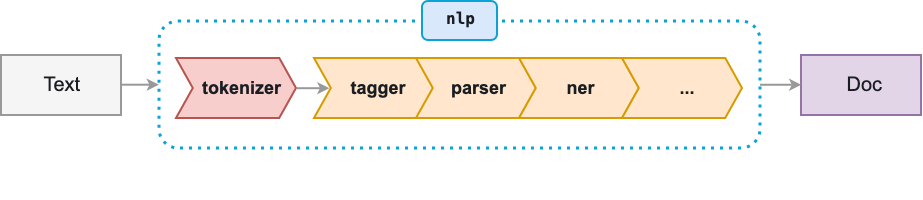



In [ ]:
text = "Kathy ate a cake from Costco"

doc = nlp(text)

doc, type(doc)

(Kathy ate a cake from Costco, spacy.tokens.doc.Doc)

In [ ]:
# How many words?
len(doc)

6

In [ ]:
print("2nd word is: ", doc[1])

2nd word is:  ate


In [ ]:
token = doc[1]

print("My position is", token.i)
print("My text is:", token.text, type(token.text))
print("My lemma is:", token.lemma_, type(token.text))

My position is 1
My text is: ate <class 'str'>
My lemma is: eat <class 'str'>


In [ ]:
# What do we know about it?
for word in doc:
  print(word, '--', word.pos_, '--', word.ent_type_)

Kathy -- PROPN -- PERSON
ate -- VERB -- 
a -- DET -- 
cake -- NOUN -- 
from -- ADP -- 
Costco -- PROPN -- ORG


The second column represents the part of speech (tagger output)

The third represents the Named Entity Type (if one exists)

Note: semantic words are not always obvious:

In [ ]:
for word in nlp("I don't like it"):
  print(word)

I
do
n't
like
it


**Exercise** - what types of entities appear in the following text? 

(You can check out all the entity types here)

In [ ]:
text = "Anastassia Kornilova lives in Virginia near the Rochambeau Memorial Bridge."

doc = nlp(text)

# Add code here
for word in doc:
  print(word, '--', word.pos_, '--', word.ent_type_)

Anastassia -- PROPN -- PERSON
Kornilova -- PROPN -- PERSON
lives -- VERB -- 
in -- ADP -- 
Virginia -- PROPN -- GPE
near -- SCONJ -- 
the -- DET -- FAC
Rochambeau -- PROPN -- FAC
Memorial -- PROPN -- FAC
Bridge -- PROPN -- FAC
. -- PUNCT -- 


We have looked at two "classes":

- Token: a single word
- Doc: the whole text




In [ ]:
doc[0], type(doc[0])

(Anastassia, spacy.tokens.token.Token)

In [ ]:
doc, type(doc)

(Anastassia Kornilova lives in Virginia near the Rochambeau Memorial Bridge.,
 spacy.tokens.doc.Doc)

The third type is Span: a group on contiguous words

Spans are usually used to represent a meaningful units of information (like a Named Entity). The three SpaCy defined automatically are: Named Entites, sentences and noun phrases.



In [ ]:
text = "Anastassia Kornilova lives in Virginia near the Rochambeau Memorial Bridge. She loves rock climbing and skiing"
doc = nlp(text)


In [ ]:
for sent in doc.sents:
  print(sent)

Anastassia Kornilova lives in Virginia near the Rochambeau Memorial Bridge.
She loves rock climbing and skiing


In [ ]:
for noun_phrase in doc.noun_chunks:
  print(noun_phrase)

Anastassia Kornilova
Virginia
the Rochambeau Memorial Bridge
She
rock climbing
skiing


In [ ]:
# Some entities have properties (e.g entity type)
for entity in doc.ents:
  print(entity, entity.label_)

Anastassia Kornilova PERSON
Virginia GPE
the Rochambeau Memorial Bridge FAC


**Exercise:** What adjectives are used to describe cats in the doc below?

Hints:

- cat is the lemma for cats
- the pos tag for adjectives is ADJ

Real-world connection: Use this to find adjectives describing a certain feature of a product.


In [ ]:

# Process the text
doc = nlp(
    "There were several black cats, one white cat and many fluffy sheep in my dream last night."
    "A cat was meowing."
)

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token is feline related
    if token.lemma_ == 'cat':
      
      # Look up the token right before this one
      prev_token = doc[token.i - 1]

      # Check if it is an adjective
      if prev_token.pos_ == 'ADJ':
        print(prev_token)

black
white


black
white


We have explored basic built-in SpaCy Properties. Next, we consider how we can customize it. By default, three steps are run:

In [ ]:
nlp.pipe_names

['tagger', 'parser', 'ner']

Sometimes we will want to do additional processing. For example, we may want to expand our Named Entity Recognition using rules (to capture unusual forms or custom types)

# Rule-based Matching

SpaCy has a pre-built component that lets us find new entities using "patterns" (like regex but better). We can use them to assign additional entities to existing types or to create a new type.

For example, let's create an Entity Type for Programming Languages:

In [ ]:
from spacy.pipeline import EntityRuler

nlp = spacy.load('en')

# overwrite_ents --> change existing labels
ruler = EntityRuler(nlp,  overwrite_ents=True)

patterns = [{"label": "PROG_LANG", "pattern": "JavaScript"}]
ruler.add_patterns(patterns)

nlp.add_pipe(ruler)
nlp.pipe_names


['tagger', 'parser', 'ner', 'entity_ruler']

In [ ]:
doc = nlp("I am learning JavaScript.")
print([(ent.text, ent.label_) for ent in doc.ents])

[('JavaScript', 'PROG_LANG')]


In [ ]:
doc = nlp("I am learning javascript.")
print([(ent.text, ent.label_) for ent in doc.ents])

[('learning javascript', 'PERSON')]


That was weird :)

In [ ]:
# Create a new copy for the exercise
nlp = spacy.load('en')

ruler = EntityRuler(nlp,  overwrite_ents=True)

# People use different cases sometimes ...
patterns = [{"label": "PROG_LANG", "pattern": [{"LOWER": "javascript"}]}]
ruler.add_patterns(patterns)

nlp.add_pipe(ruler)



In [ ]:
doc = nlp("I am learning JAVAscript.")
print([(ent.text, ent.label_) for ent in doc.ents])

[('JAVAscript', 'PROG_LANG')]


**Exercise:** Add in rules for two other programming languages that you like:

In [ ]:
# Create a new copy for the exercise
nlp = spacy.load('en')

ruler = EntityRuler(nlp,  overwrite_ents=True)

ruler = EntityRuler(nlp,  overwrite_ents=True)
patterns = [{"label": "PROG_LANG", 
             "pattern": [{"LOWER": "javascript"}]},
             ## YOUR PATTERN HERE ##
            ]
ruler.add_patterns(patterns)

nlp.add_pipe(ruler)


For simple patterns, you can just type the exact strings:

In [ ]:
nlp = spacy.load('en')

ruler = EntityRuler(nlp,  overwrite_ents=True)

ruler = EntityRuler(nlp,  overwrite_ents=True)
patterns = [{"label": "PROG_LANG", 
             "pattern": "C ++",}
             ## YOUR PATTERN HERE ##
            ]
ruler.add_patterns(patterns)

nlp.add_pipe(ruler)

doc = nlp("I code in C ++")
for ent in doc.ents:
  print(ent, ent.label_)


C ++ PROG_LANG


SpaCy, also, has the ability to match on more complex linguistic patterns. They have a visual debugging tool: https://explosion.ai/demos/matcher

We can use this tool to rewrite our cats example from above

(Api Reference: https://spacy.io/usage/rule-based-matching#matcher)

In [ ]:
from spacy.matcher import Matcher

patterns =  [[{'POS': 'ADJ'},
           {'LEMMA': 'cat', 'POS': 'NOUN'}]]# ADD NEW CAT PATTERN HERE (add as list within this list)

matcher = Matcher(nlp.vocab)
matcher.add("CatPattern", None, *patterns)

doc = nlp(
    "There were several black cats, one white cat and many fluffy sheep in my dream last night."
    "A cat was meowing."
)

matches = matcher(doc)
for match_id, start, end in matches:
    span = doc[start:end]
    print(span.text)

black cats
white cat


In [ ]:
## Solutions -- remove ##
from spacy.matcher import Matcher

patterns =  [[{'POS': 'ADJ'}, {'LEMMA': 'cat', 'POS': 'NOUN'}]]# ADD NEW CAT PATTERN HERE]

matcher = Matcher(nlp.vocab)
matcher.add("CatPattern", None, *patterns)

doc = nlp(
    "There were several black cats, one white cat and many fluffy sheep in my dream last night."
    "A cat was meowing."
)

matches = matcher(doc)
for match_id, start, end in matches:
    span = doc[start:end]
    print(span.text)

# Further Customization



## Custom Components

Beyond Entity Ruler, we can create our own SpaCy components to do whatever we want.

They have to be a method that takes in an "Doc" and returns it.

For example, we will create a "toy" component that prints out the length of the Doc when it processes it.

In [ ]:
import spacy
nlp = spacy.load('en')

In [ ]:
def length_printer(doc):
  print(f"This doc is {len(doc)} words long")
  return doc

In [ ]:
nlp.add_pipe(length_printer, name="length_printer")

In [ ]:
text = "This is a short sentence"
doc = nlp(text)

This doc is 5 words long


## Custom Attributes

SpaCy has logic to add custom attributes to any Doc, Token or Span. This let's us add information beyond "parts-of-speech", "ner" to the document for later reference.

In [ ]:
from spacy.tokens import Doc, Token, Span

# I set force=True to allow re-running this cell. In a real product, it should only be run once
Token.set_extension('is_tree', default=False, force=True)


In [ ]:
doc = nlp("I am Groot")
doc[2]._.is_tree = True

for word in doc:
  print(word, word._.is_tree)

This doc is 3 words long
I False
am False
Groot True


## Putting it together

We will now consider a use-case for both custom components and attributes.

The default SpaCy English model does not include "Prefixes" as part of the name:

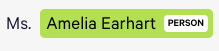

However, this information may be useful (especially if we only have a last name). We can create a component that will stores information on the prefix as an attribute.




In [ ]:
nlp = spacy.load('en')

doc = nlp("Ms. Amerlia Earhart")

for ent in doc.ents:
  print(ent)

Amerlia Earhart


In [ ]:
# First we need to design a new custom attribute
# If you run this cell more than once, it will raise an error - you can ignore it
Span.set_extension('prefix', default=None, force=True)

In [ ]:
def store_person_prefix(doc):

    all_prefixes = ["Dr.", "Mr.",  "Ms."]
    

    for ent in doc.ents:

        # Focus on people that are not the first word in the sentence
        # ent.start == id of the first token
        if ent.label_ == "PERSON" and ent.start != 0:

            # Look up the previous token
            prev_token = __[__.__ - 1]

            # Check if it is one of our prefixes
            if __.__ in all_prefixes:
              
              # EXERCISE: Set the text of the prefix #
              ent._.prefix = __.__

    return doc

def store_person_prefix(doc):

    all_prefixes = ["Dr.", "Mr.",  "Ms."]
    

    for ent in doc.ents:

        # Focus on people that are not the first word in the sentence
        # ent.start == id of the first token
        if ent.label_ == "PERSON" and ent.start != 0:

            # Look up the previous token
            prev_token = doc[ent.start - 1]

            # Check if it is one of our prefixes
            if prev_token.text in all_prefixes:
              
              # EXERCISE: Set the text of the prefix #
              ent._.prefix = prev_token.text

    return doc

In [ ]:
# Add in the pipeline
nlp = spacy.load('en') # Reload for testing
nlp.add_pipe(store_person_prefix, 'prefix_processor')


In [ ]:
doc = nlp('Ms. Amerlia Earhart')

for ent in doc.ents:
  if ent.label_ == 'PERSON':
    print(ent, "has the prefix", ent._.prefix)


Amerlia Earhart has the prefix Ms.


In [ ]:
# Remove the old version of the component
nlp.remove_pipe('prefix_processor')

('prefix_processor', <function __main__.expand_person_entities>)

Alternatively, we can change the entity to include the prefix

In [ ]:
def expand_person_entities(doc):

    all_prefixes = ["Dr.", "Mr.",  "Ms."]
    
    # We will create a new list of entities
    new_ents = []
    for ent in doc.ents:

        # Focus on people that are not the first word in the sentence
        # ent.start == id of the first token
        if ent.label_ == "PERSON" and ent.start != 0:

            # Look up the previous token
            prev_token = doc[ent.start - 1]

            # Check if it is one of our prefixes
            if prev_token.text in all_prefixes:

                # Create a new span that starts one word earlier
                new_ent = Span(doc, ent.start - 1, ent.end, label=ent.label)
                new_ents.append(new_ent)
            
            # Base cases below - can be ignored
            else:
                new_ents.append(ent)
        else:
            new_ents.append(ent)

    # Assign the new sent of ents to the document
    doc.ents = new_ents
    
    return doc

In [ ]:
nlp = spacy.load('en')
nlp.add_pipe(expand_person_entities, 'prefix_component')

In [ ]:
doc = nlp("Ms. Amerlia Earhart")
for ent in doc.ents:
  print(ent)

Ms. Amerlia Earhart


# What's next?

- Take the full NLP course from SpaCy: https://course.spacy.io/en
- Follow the SpaCy github community: https://github.com/explosion/spaCy/discussions
- Train a custom model: https://spacy.io/usage/training

## A few additional cool features

Larger SpaCy Models have individual word-vectors that would let you compare how similar two sentences are:

You can find other models here: https://spacy.io/usage/models

# A few additional features 

## Vector Similarity

Larger SpaCy Models have individual word-vectors that would let you compare how similar two sentences are:

Api reference: https://spacy.io/usage/vectors-similarity#basics


In [ ]:
# Alternative loading scheme
import en_core_web_lg   
nlp = en_core_web_lg.load()

In [ ]:
doc = nlp("cat kitten kettle")

In [ ]:
doc[0].vector

array([-0.15067  , -0.024468 , -0.23368  , -0.23378  , -0.18382  ,
        0.32711  , -0.22084  , -0.28777  ,  0.12759  ,  1.1656   ,
       -0.64163  , -0.098455 , -0.62397  ,  0.010431 , -0.25653  ,
        0.31799  ,  0.037779 ,  1.1904   , -0.17714  , -0.2595   ,
       -0.31461  ,  0.038825 , -0.15713  , -0.13484  ,  0.36936  ,
       -0.30562  , -0.40619  , -0.38965  ,  0.3686   ,  0.013963 ,
       -0.6895   ,  0.004066 , -0.1367   ,  0.32564  ,  0.24688  ,
       -0.14011  ,  0.53889  , -0.80441  , -0.1777   , -0.12922  ,
        0.16303  ,  0.14917  , -0.068429 , -0.33922  ,  0.18495  ,
       -0.082544 , -0.46892  ,  0.39581  , -0.13742  , -0.35132  ,
        0.22223  , -0.144    , -0.048287 ,  0.3379   , -0.31916  ,
        0.20526  ,  0.098624 , -0.23877  ,  0.045338 ,  0.43941  ,
        0.030385 , -0.013821 , -0.093273 , -0.18178  ,  0.19438  ,
       -0.3782   ,  0.70144  ,  0.16236  ,  0.0059111,  0.024898 ,
       -0.13613  , -0.11425  , -0.31598  , -0.14209  ,  0.0281

In [ ]:
doc[0].similarity(doc[1])

0.8215553

In [ ]:
doc[0].similarity(doc[2])

0.15489885

In [ ]:
# Also works for full sentences

test = "Cakes are yummy"
doc = nlp(test)

test2 = "Desserts are my life"
doc2 = nlp(test2)

test3 = "Computers are annoying"
doc3 = nlp(test3)

In [ ]:
doc.similarity(doc2)

0.7511579554447001

In [ ]:
doc.similarity(doc3)

0.4602056294608959